# Importando Bibliotecas

In [20]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Carragando o Banco de Dados

In [22]:
df = pd.read_csv('DelayedFlights.zip')

Mostrar todas as colunas

In [23]:
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [24]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [25]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [26]:
# filtrando apenas os desviados
voos_desviados = df[df['Diverted']==1]

In [27]:
# Excluindo colunas que não serão utilizadas na análise
voos_desviados.drop(['Year','TaxiIn', 'TaxiOut', 'Diverted',
                     'TailNum', 'FlightNum', 'UniqueCarrier',
        'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

In [28]:
voos_desviados.shape

(7754, 18)

Verificar a quantidade de linhas com valores nulos

In [29]:
voos_desviados.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    7754
SecurityDelay        7754
ActualElapsedTime    7754
AirTime              7754
ArrDelay             7754
NASDelay             7754
WeatherDelay         7754
CarrierDelay         7754
CRSElapsedTime        198
Cancelled               0
CancellationCode        0
Month                   0
Distance                0
DayofMonth              0
Origin                  0
DepDelay                0
DayOfWeek               0
Dest                    0
dtype: int64

In [30]:
voos_desviados.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
ActualElapsedTime       0
CRSElapsedTime        448
AirTime                 0
ArrDelay                0
DepDelay              367
Origin                226
Dest                  247
Distance             1139
Cancelled               1
CancellationCode        1
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

podemos verificar que só há uma resposta para a coluna 'Cancelled' mostrando que não há voos registrados concomitantemente como cancelado e desviado. Por isso, pode ser retirado as colunas 'Cancelled' e 'CancellationCode'

In [31]:
# Excluindo colunas que só tem valores nulos e as colunas 'Cancelled' e 'CancellationCode'
voos_desviados.drop(['LateAircraftDelay','SecurityDelay',
                     'ActualElapsedTime', 'AirTime',
                     'ArrDelay', 'NASDelay', 'WeatherDelay',
                     'CarrierDelay', 'Cancelled','CancellationCode'],
                       axis=1, inplace=True)
voos_desviados

,Month,DayofMonth,DayOfWeek,CRSElapsedTime,DepDelay,Origin,Dest,Distance
1280,1,3,4,95.0,7.0,SAN,SMF,480
1372,1,3,4,90.0,265.0,SFO,SAN,447
1776,1,4,5,65.0,44.0,BOI,RNO,335
1831,1,4,5,80.0,32.0,BUR,SMF,358
2244,1,4,5,85.0,139.0,LAS,RNO,345
...,...,...,...,...,...,...,...,...
1934369,12,7,7,407.0,163.0,JFK,SFO,2586
1934921,12,9,2,128.0,52.0,ATL,ORD,606
1935596,12,10,3,79.0,34.0,JAN,ATL,341
1935716,12,11,4,344.0,169.0,LAX,JFK,2475


In [32]:
lista_var_continuas = ['CRSElapsedTime','DepDelay','Distance']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']
df_continua = voos_desviados[lista_var_continuas]
df_discreta = voos_desviados[lista_var_discretas]

In [38]:
print(df_continua.describe())

       CRSElapsedTime     DepDelay     Distance
count     7556.000000  7754.000000  7754.000000
mean       162.412123    62.445576   962.236652
std         90.698258    73.363356   679.826966
min        -25.000000     6.000000    31.000000
25%         95.000000    16.000000   449.000000
50%        142.000000    37.000000   787.000000
75%        205.000000    82.000000  1235.000000
max        635.000000  1154.000000  4962.000000


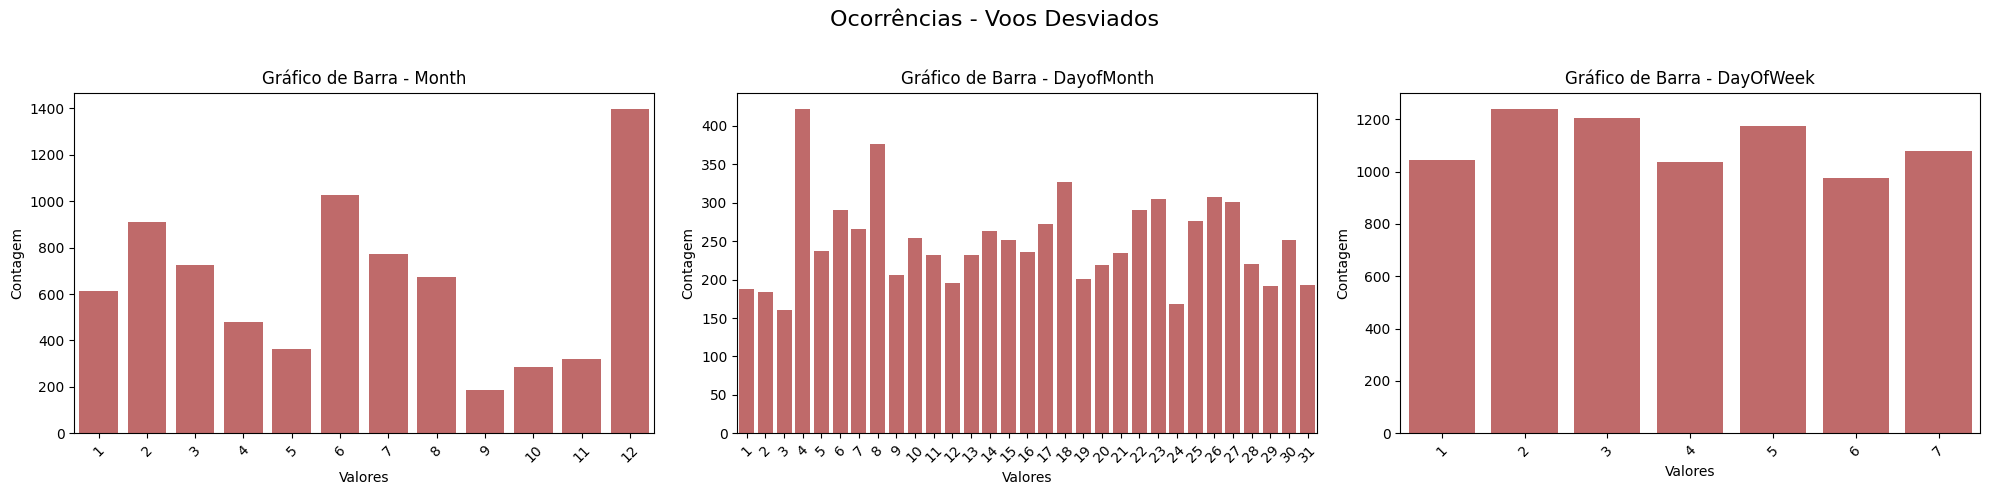

In [36]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df_discreta[[i]], ax=ax, color='IndianRed')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')
    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Desviados', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

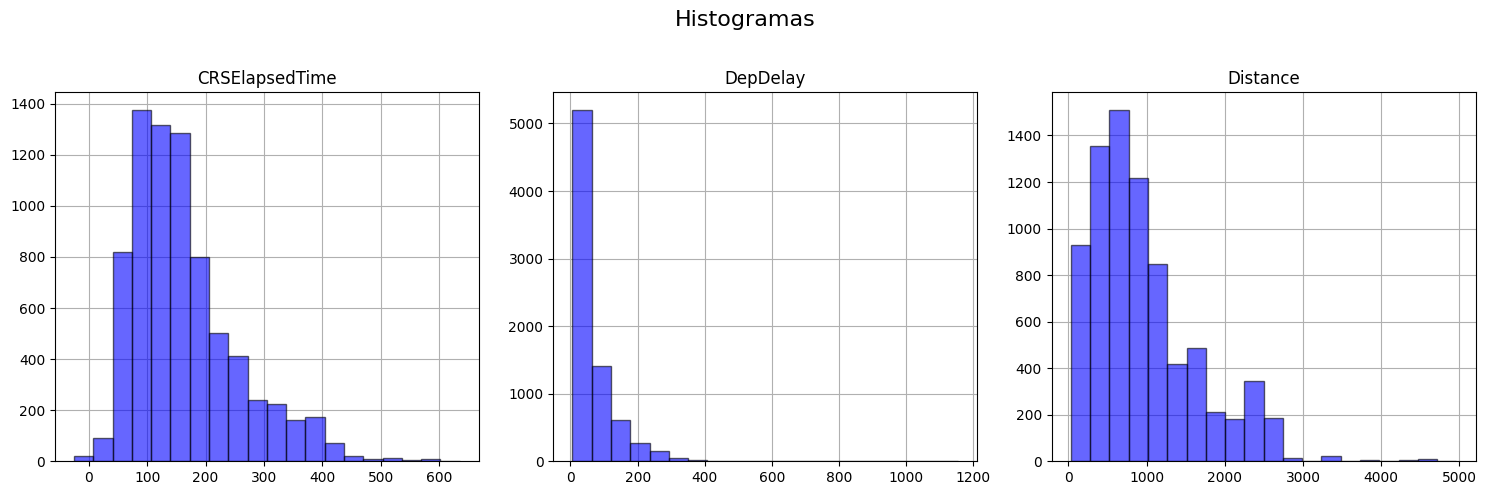

In [44]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df_continua[i].hist(bins=20, color='blue', edgecolor='black', alpha=0.6, ax=ax, zorder=4)
    ax.set_title(f'{i}')

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

In [45]:
df_num = voos_desviados.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,CRSElapsedTime,DepDelay,Distance
Month,1.000000,0.192712,0.013662,0.079054,-0.011460,0.064909
DayofMonth,0.192712,1.000000,0.096128,0.038461,-0.017775,0.037254
DayOfWeek,0.013662,0.096128,1.000000,0.048459,-0.021155,0.046652
CRSElapsedTime,0.079054,0.038461,0.048459,1.000000,-0.051116,0.949775
DepDelay,-0.011460,-0.017775,-0.021155,-0.051116,1.000000,-0.062753
Distance,0.064909,0.037254,0.046652,0.949775,-0.062753,1.000000


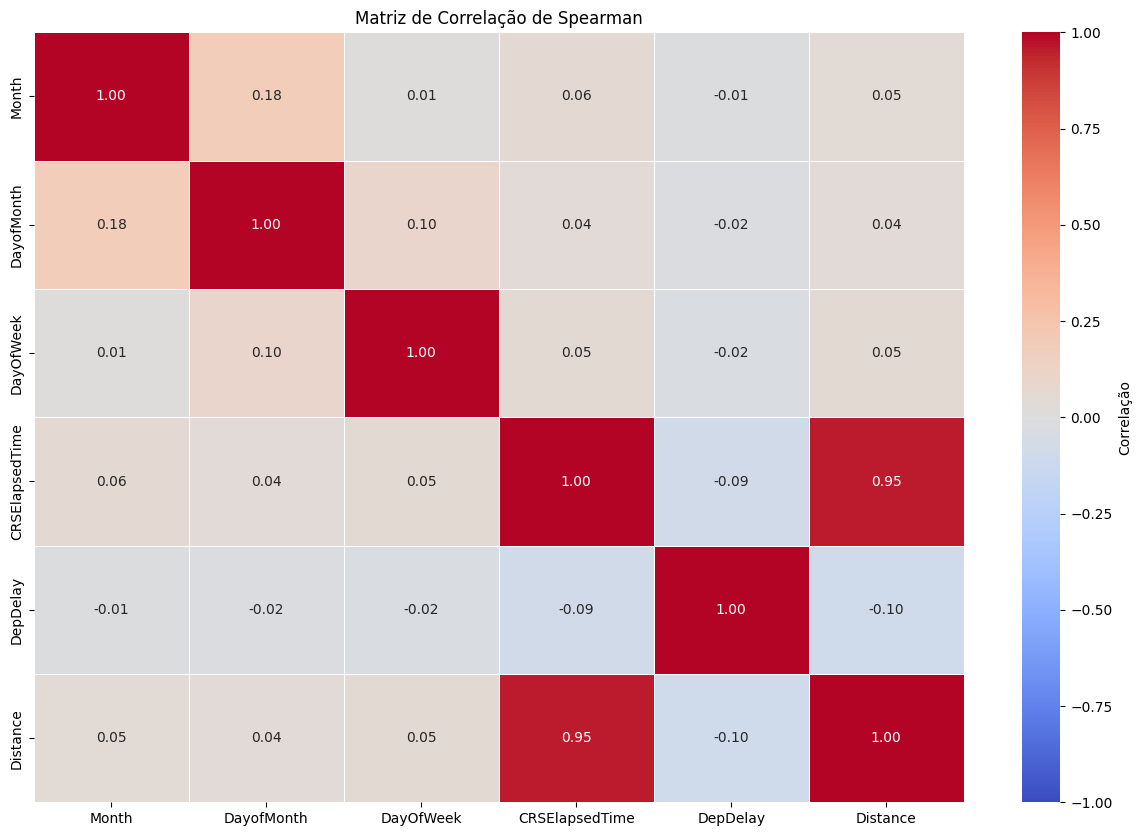

In [46]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

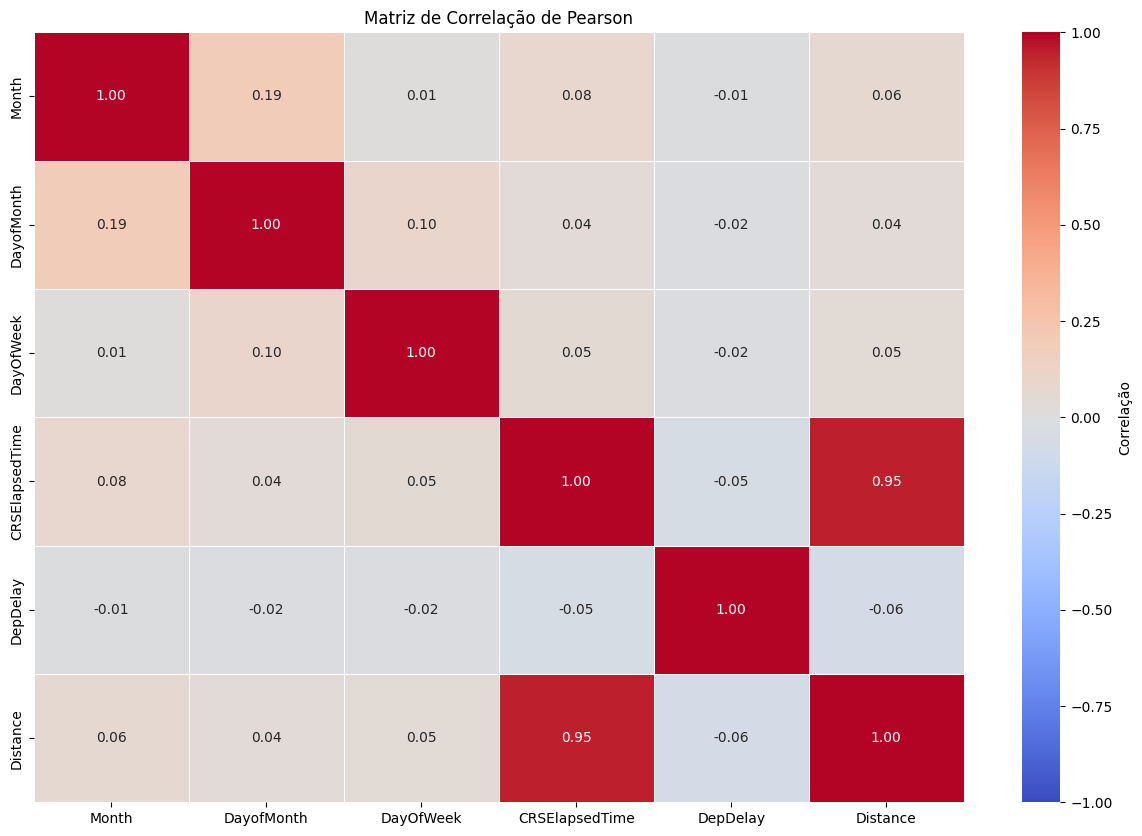

In [47]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()

A única relação forte que há é entre a distância e o tempo estimado de voo. Pois quanto maior a distância maior será o tempo estimado de voo.

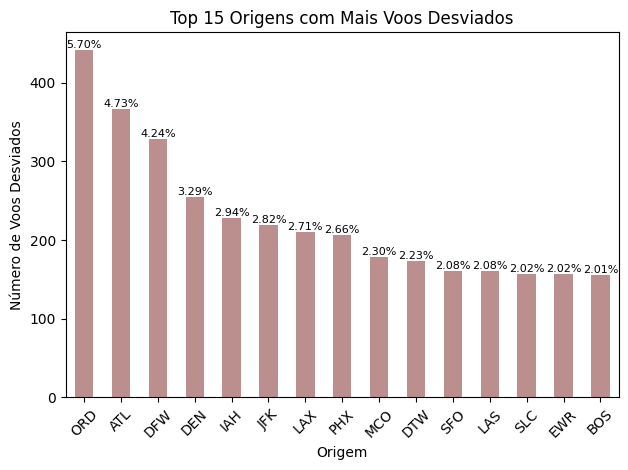

In [55]:
# Origem com mais voos desviados
voos_desviados['Origin'].value_counts().nlargest(15).plot(kind='bar', color='RosyBrown')

# Calculando contagens e porcentagens
contagens = voos_desviados['Origin'].value_counts().nlargest(15)
total_voos_desviados = len(voos_desviados)
porcentagens = (contagens / total_voos_desviados) * 100
# Adicionando rótulos e título
plt.title('Top 15 Origens com Mais Voos Desviados')
plt.xlabel('Origem')
plt.ylabel('Número de Voos Desviados')

for i, v in enumerate(contagens):
    porcentagem = porcentagens.iloc[i]
    plt.text(i, v + 0.1, f'{porcentagem:.2f}%', ha='center', va='bottom', fontsize=8)


# Melhorando a estética do gráfico
plt.xticks(rotation=45)  # Rotacionando os rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajustando o layout para evitar sobreposição

# Exibindo o gráfico
plt.show()

## Por enquanto ignore tudo daqui para baixo... preciso verificar uns erros

# Análise de voos Desviados:

In [59]:
contagens_normalizadas = voos_desviados['Month'].value_counts()
print(contagens_normalizadas)

Month
12    1397
6     1026
2      909
7      774
3      726
8      674
1      612
4      481
5      361
11     321
10     285
9      188
Name: count, dtype: int64


voos cancelados em todos os meses do ano

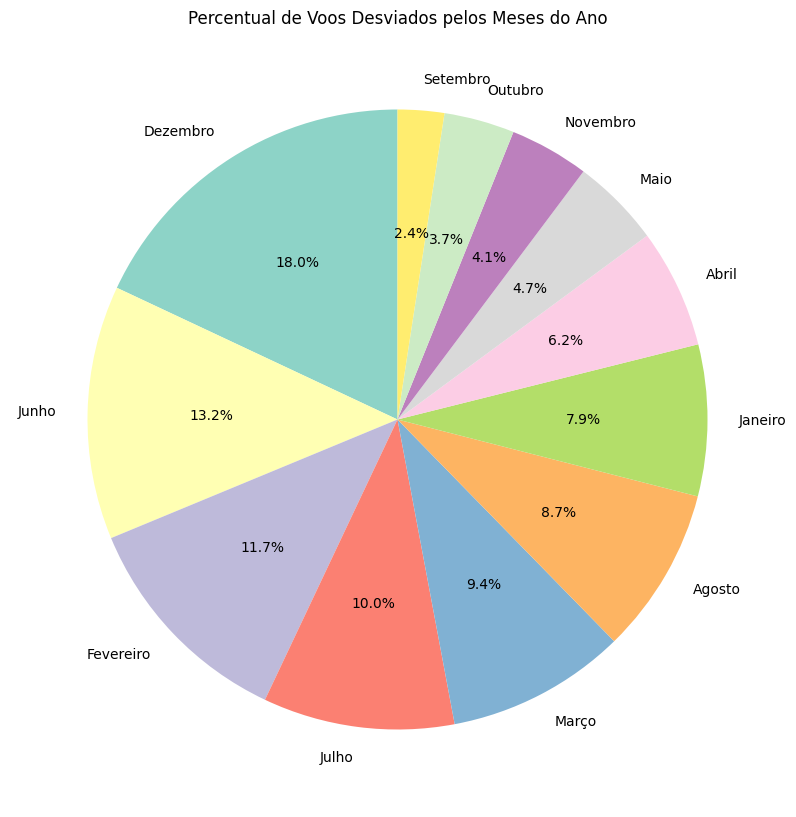

In [72]:
# colocanos na ordem apresentadas no value_counts
meses_do_ano = ['Dezembro', 'Junho', 'Fevereiro',
                'Julho','Março', 'Agosto', 'Janeiro',
                'Abril', 'Maio','Novembro','Outubro', 'Setembro']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=meses_do_ano, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Meses do Ano')
plt.show()

In [73]:
contagens_normalizadas = voos_desviados['DayOfWeek'].value_counts(normalize=True) * 100
print(contagens_normalizadas)

DayOfWeek
2    15.978850
3    15.514573
5    15.153469
7    13.902502
1    13.464019
4    13.386639
6    12.599948
Name: proportion, dtype: float64


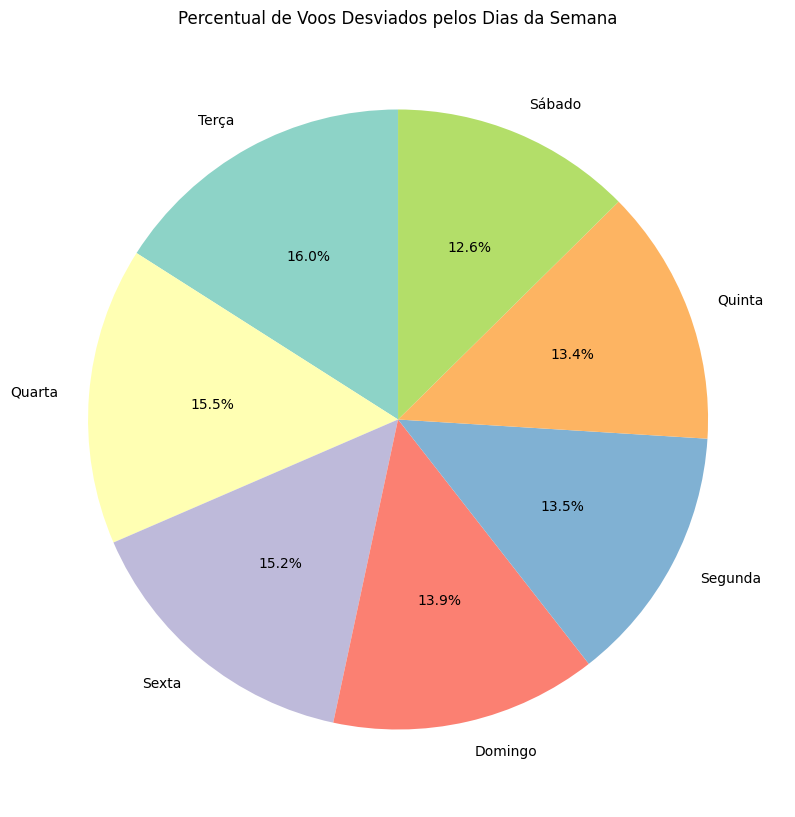

In [74]:
# colocanos na ordem apresentadas no value_counts
dias_da_semana = ['Terça', 'Quarta', 'Sexta',
                'Domingo','Segunda', 'Quinta', 'Sábado']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=dias_da_semana, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Dias da Semana')
plt.show()

In [76]:
voos_desviados

,Month,DayofMonth,DayOfWeek,CRSElapsedTime,DepDelay,Origin,Dest,Distance
1280,1,3,4,95.0,7.0,SAN,SMF,480
1372,1,3,4,90.0,265.0,SFO,SAN,447
1776,1,4,5,65.0,44.0,BOI,RNO,335
1831,1,4,5,80.0,32.0,BUR,SMF,358
2244,1,4,5,85.0,139.0,LAS,RNO,345
...,...,...,...,...,...,...,...,...
1934369,12,7,7,407.0,163.0,JFK,SFO,2586
1934921,12,9,2,128.0,52.0,ATL,ORD,606
1935596,12,10,3,79.0,34.0,JAN,ATL,341
1935716,12,11,4,344.0,169.0,LAX,JFK,2475
